In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,x,y,z,t
0,0.108610,0.901637,3.495175,5.548247
1,1.441267,1.666423,3.554596,-3.839294
2,-0.492374,0.112673,3.902964,13.713320
3,1.106691,0.754194,3.447355,8.432243
4,1.553509,3.087109,3.756501,-1.373107


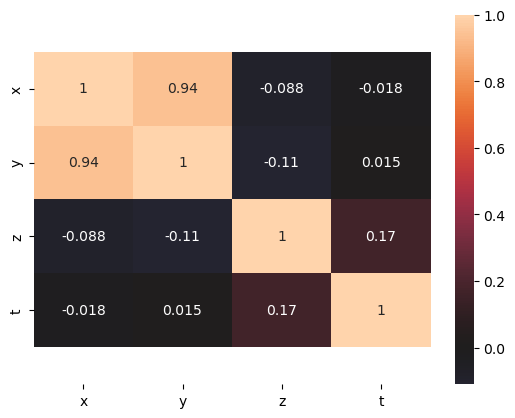

In [3]:
sns.heatmap(df.corr(), center=0, annot=True)
bottom, top = plt.ylim()
plt.ylim(bottom + 0.5, top - 0.5)
plt.show()

From this output, we see that attributes 'x' and 'y' have a correlation coefficient that is quite high: 0.94.



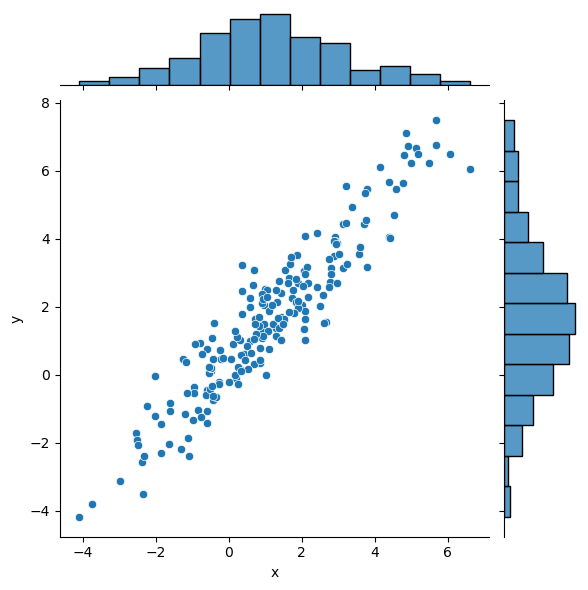

In [4]:
#Using this jointplot() method in seaborn, create a combined plot with two elements: a scatter plot on a two-dimensional plane where the coordinates of the points correspond to the individual values in 'x' and 'y' respectively, and two histograms representing the distributions of those values.
#Observe the output and decide whether the two distributions have the same mean

sns.jointplot(x='x', y='y', data=df)
plt.show()

#### From this visualization, it is not clear whether the two attributes have the same mean or not.
Instead of using a visualization, run a t-test with 0.05 level of significance to decide whether the two attributes have the same mean:



In [5]:
ttest_ind(df['x'], df['y']).pvalue

0.011436482008949079

This p-value is indeed lower than 0.05, allowing us to reject the null hypothesis that the two distributions have the same mean, even though they are highly correlated.



In [6]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(df[['x', 'z']], df['y'])

LinearRegression()